In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import helper as hp
from statsmodels.regression import linear_model
import scipy.stats as stats

plt.style.use('ggplot')

In [2]:
pathways = {'Denver, CO': ('~/Desktop/capstone/data/Denver_1940_2010.csv', ''),
            'Seattle, WA': ('~/Desktop/capstone/data/Seattle_1898_.csv', 'SEATTLE TACOMA AIRPORT, WA US'),
#            'North Bend, WA': ('~/Desktop/capstone/data/Seattle_1898_.csv', 'CEDAR LAKE, WA US'),
            'Boston, MA': ('~/Desktop/capstone/data/Boston_1936_corr.csv', ''),
#             'JP': ('~/Desktop/capstone/data/JP.csv', ''),
            'Baton Rouge, LA': ('~/Desktop/capstone/data/Baton_Rouge.csv','')}

In [3]:
####  Load all
start_date = datetime(1950,1,1)
end_date = datetime(2019,12,31)
day_start = 15      # number of days from the start of the year to filter on
day_stop = 22
Location = dict()
for name, path in pathways.items():
    Location[name] = hp.GHCN_Loc(*path)
    Location[name].set_range(start_date, end_date)
    Location[name].process()
#     Location[name].create_aggregate_df()
    Location[name].day_start = day_start
    Location[name].day_stop = day_stop
    Location[name].create_sampled_df()

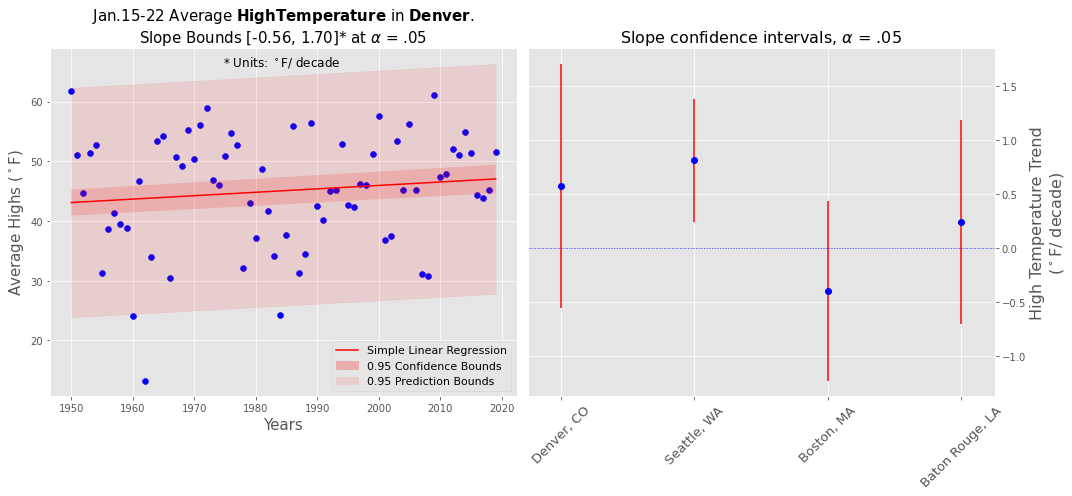

In [16]:
day_start = 15
day_stop = 22

for data_obj in Location.values():
    data_obj.day_start = day_start
    data_obj.day_stop = day_stop
    data_obj.create_sampled_df()

fig, axs = plt.subplots(1,2, figsize=(15,7))

Loc = Location['Denver, CO']
CI = Loc.stats(axs[0], 'TMAX_avg', 0.05, True, True)

axs[0].legend(fontsize=11, loc='lower right')
leg = axs[0].get_legend()
leg.legendHandles[1].set_color([1, 0, 0, 0.25])

axs[0].set_ylabel(hp.ylabel_dict['TMAX_avg'], fontsize = 15)
axs[0].set_xlabel('Years', fontsize = 15)
title_text = r"Slope Bounds [{:.2f}, {:.2f}]* at $\alpha$ = .05".format(CI[0]*10, CI[1]*10)
axs[0].set_title(r"""Jan.15-22 Average ${\bfHigh Temperature}$ in ${\bfDenver}$.
"""             + title_text, fontsize = 15)
axs[0].text(0.37, .95, r'* Units: $^\circ$F/ decade', transform=axs[0].transAxes, fontsize=12)

plt.xticks(fontsize = 14);
plt.yticks(fontsize = 14);

#### Get Confidence Intervals
CI_dict = dict()
agg_name = 'TMAX_avg'

for key, data_obj in Location.items():
        CI_dict[key] = data_obj.stats(0, agg_name, 0.05, False, True)

X = list(range(1,2*len(CI_dict),2))
X_labels = []
Y_mean = []
Y_error = []
for name, CI in CI_dict.items():
    X_labels.append(name)
    Y_mean.append(CI.mean()*10)
    Y_error.append((CI.mean()-CI[0])*10)

axs[1].errorbar(X, Y_mean, yerr=Y_error, fmt = 'o', color = 'b', ecolor='r')
plt.xticks(X, X_labels)
axs[1].set_ylabel(r'''High Temperature Trend
($^\circ$F/ decade)''', fontsize = 16)
axs[1].set_title(r'''Slope confidence intervals, $\alpha$ = .05''', fontsize = 16)

axs[1].plot([0,10], [0,0], 'b--', linewidth=0.5)
plt.xticks(fontsize = 13, rotation=45);
plt.yticks(fontsize = 12);
plt.xlim([0.5,max(X)+0.5]);
# plt.grid(False)
plt.tight_layout()
axs[1].yaxis.set_label_position("right")
axs[1].yaxis.tick_right()

plt.tight_layout()
plt.savefig('Denver_TMAX_winter_both.png', edgecolor = 'b')

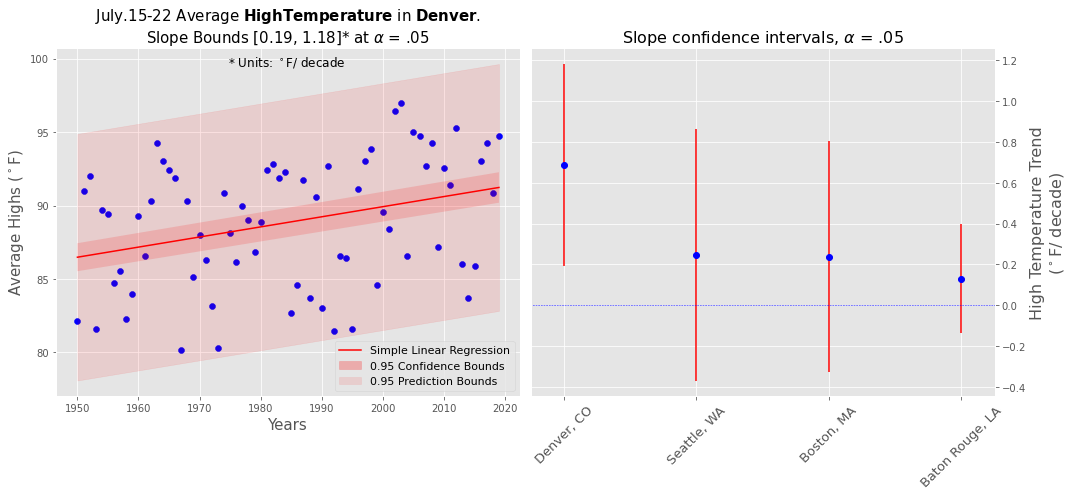

In [17]:
day_start = 196
day_stop = 203

for data_obj in Location.values():
    data_obj.day_start = day_start
    data_obj.day_stop = day_stop
    data_obj.create_sampled_df()
    
fig, axs = plt.subplots(1,2, figsize=(15,7))

Loc = Location['Denver, CO']
CI = Loc.stats(axs[0], 'TMAX_avg', 0.05, True, True)

axs[0].legend(fontsize=11, loc='lower right')
leg = axs[0].get_legend()
leg.legendHandles[1].set_color([1, 0, 0, 0.25])

axs[0].set_ylabel(hp.ylabel_dict['TMAX_avg'], fontsize = 15)
axs[0].set_xlabel('Years', fontsize = 15)
title_text = r"Slope Bounds [{:.2f}, {:.2f}]* at $\alpha$ = .05".format(CI[0]*10, CI[1]*10)
axs[0].set_title(r"""July.15-22 Average ${\bfHigh Temperature}$ in ${\bfDenver}$.
"""             + title_text, fontsize = 15)
axs[0].text(0.37, .95, r'* Units: $^\circ$F/ decade', transform=axs[0].transAxes, fontsize=12)

plt.xticks(fontsize = 14);
plt.yticks(fontsize = 14);

#### Get Confidence Intervals
CI_dict = dict()
agg_name = 'TMAX_avg'

for key, data_obj in Location.items():
        CI_dict[key] = data_obj.stats(0, agg_name, 0.05, False, True)

X = list(range(1,2*len(CI_dict),2))
X_labels = []
Y_mean = []
Y_error = []
for name, CI in CI_dict.items():
    X_labels.append(name)
    Y_mean.append(CI.mean()*10)
    Y_error.append((CI.mean()-CI[0])*10)

axs[1].errorbar(X, Y_mean, yerr=Y_error, fmt = 'o', color = 'b', ecolor='r')
plt.xticks(X, X_labels)
axs[1].set_ylabel(r'''High Temperature Trend
($^\circ$F/ decade)''', fontsize = 16)
axs[1].set_title(r'''Slope confidence intervals, $\alpha$ = .05''', fontsize = 16)

axs[1].plot([0,10], [0,0], 'b--', linewidth=0.5)
plt.xticks(fontsize = 13, rotation=45);
plt.yticks(fontsize = 12);
plt.xlim([0.5,max(X)+0.5]);
# plt.grid(False)
plt.tight_layout()
axs[1].yaxis.set_label_position("right")
axs[1].yaxis.tick_right()

plt.tight_layout()
plt.savefig('Denver_TMAX_summer_both.png', edgecolor = 'b')

In [12]:
datetime(2020,7,15)-datetime(2020,1,1)

datetime.timedelta(days=196)